In [1]:
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

import helper_utils

In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"Using device: CUDA")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
    print(f"Using device: MPS (Apple Silicon GPU)")
else:
    device = torch.device("cpu")
    print(f"Using device: CPU")

Using device: CPU


In [3]:
# Set the path to store the dataset files
data_path = "./data"

In [4]:
train_dataset_without_transform = torchvision.datasets.MNIST(
    root=data_path,     # Path to the directory where the data is/will be stored
    train=True,         # Specify that you want the training split of the dataset
    download=True       # Download the data if it's not found in the root directory
)

In [5]:
train_dataset_without_transform?

Type:        MNIST
String form:
Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
Length:      60000
File:        ~/miniconda3/envs/pytorch_gpu_0710/lib/python3.10/site-packages/torchvision/datasets/mnist.py
Docstring:  
`MNIST <http://yann.lecun.com/exdb/mnist/>`_ Dataset.

Args:
    root (str or ``pathlib.Path``): Root directory of dataset where ``MNIST/raw/train-images-idx3-ubyte``
        and  ``MNIST/raw/t10k-images-idx3-ubyte`` exist.
    train (bool, optional): If True, creates dataset from ``train-images-idx3-ubyte``,
        otherwise from ``t10k-images-idx3-ubyte``.
    transform (callable, optional): A function/transform that  takes in a PIL image
        and returns a transformed version. E.g, ``transforms.RandomCrop``
    target_transform (callable, optional): A function/transform that takes in the
        target and transforms it.
    download (bool, optional): If True, downloads the dataset from the internet and
        puts it in r

In [6]:
train_dataset_without_transform[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [10]:
# Get the first sample (index 0), as a (image, label) tuple
image_pil, label = train_dataset_without_transform[1] # Get the first image
    
print(f"Image type:        {type(image_pil)}")
# Since `image_pil` is a PIL Image object, its dimensions are accessed using the .size attribute.
print(f"Image Dimensions:  {image_pil.size}")
print(f"Label Type:        {type(label)}")
print(f"Label value:       {label}")

Image type:        <class 'PIL.Image.Image'>
Image Dimensions:  (28, 28)
Label Type:        <class 'int'>
Label value:       0


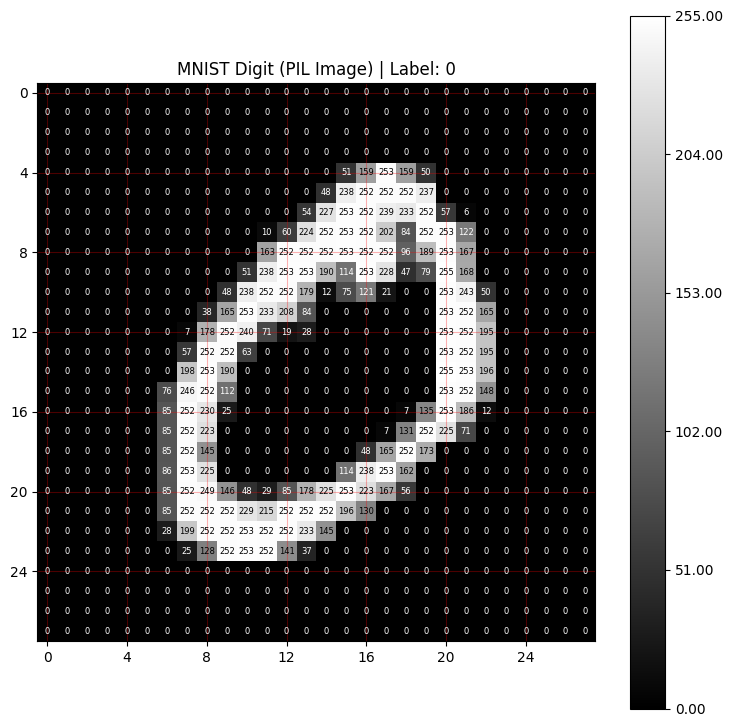

In [11]:
# Visualize the sample image and its corresponding label
helper_utils.display_image(image_pil, label, "MNIST Digit (PIL Image)", show_values=True)

In [12]:
image_pil

In [13]:
raw_pixels = np.array(image_pil)

In [17]:
tensor_manual = torch.from_numpy(raw_pixels).float() / 255.0

In [23]:
print(type(raw_pixels))
print(type(tensor_manual))
print(raw_pixels.shape)
print(tensor_manual.shape)
print(raw_pixels.dtype)
print(tensor_manual.dtype)

<class 'numpy.ndarray'>
<class 'torch.Tensor'>
(28, 28)
torch.Size([28, 28])
uint8
torch.float32


In [32]:
to_tensor = transforms.ToTensor()
tensor_actual = to_tensor(image_pil)
print(tensor_actual.shape)
print(tensor_actual.dtype)
print(tensor_actual.squeeze())  # Remove channel dimension for display
print(f"Shape: {tensor_actual.shape}")  # Will be [1, 3, 3] for grayscale


torch.Size([1, 28, 28])
torch.float32
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 

In [31]:
x = torch.zeros(2, 1, 2, 1, 2)
print(x.size())
print(x.shape)

x2 = torch.zeros(2, 1, 2, 1, 2)
print(f"{x2.squeeze()}")
print(f"x2: {x2.shape}")
x3 = x2.squeeze()
print(f"x3: {x3.shape}")

y = torch.squeeze(x)
print(y.size())
y = torch.squeeze(x, 0)
print(y.size())
y = torch.squeeze(x, 1)
print(y.size())
y = torch.squeeze(x, (1, 2, 3))
print(y.size())

torch.Size([2, 1, 2, 1, 2])
torch.Size([2, 1, 2, 1, 2])
tensor([[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]])
x2: torch.Size([2, 1, 2, 1, 2])
x3: torch.Size([2, 2, 2])
torch.Size([2, 2, 2])
torch.Size([2, 1, 2, 1, 2])
torch.Size([2, 2, 1, 2])
torch.Size([2, 2, 2])


In [ ]:
would the 